# 📊 Lab 01: Introducción a Big Data

## Objetivos de Aprendizaje
- Comprender qué es Big Data y por qué es importante
- Entender las 5 Vs del Big Data con ejemplos del mundo real
- Diferenciar entre datos estructurados, semi-estructurados y no estructurados
- Crear tu primera SparkSession y cargar datos
- Realizar operaciones básicas de exploración de datos

## Prerequisitos
- Lab 00: Setup del entorno completado
- Docker Desktop corriendo con el cluster de Spark activo
- Conocimientos básicos de Python

## ⏱️ Tiempo Estimado
**90-120 minutos**

## 📚 Módulo AWS Academy Relacionado
**Módulo 3: Data Characteristics** - Las 5 Vs del Big Data, tipos de datos, ciclo de vida de los datos

---
# === SECCIÓN 1: ¿QUÉ ES BIG DATA? ===

## 1. Introducción a Big Data

### Explicación Conceptual

**Big Data** no es simplemente "muchos datos". Es un término que describe conjuntos de datos tan grandes y complejos que las herramientas tradicionales (como Excel o bases de datos SQL simples) no pueden procesarlos eficientemente.

#### 🌍 Analogía del Mundo Real

Imagina que tienes una biblioteca:
- **Datos tradicionales**: Una biblioteca pequeña con 1,000 libros. Puedes buscar manualmente.
- **Big Data**: La Biblioteca del Congreso de EE.UU. con 170 millones de items. Necesitas sistemas automatizados.

#### 📈 ¿Cuántos datos se generan?

- **90% de los datos del mundo** se han creado en los últimos 2 años
- Cada día se generan **2.5 quintillones de bytes** de datos
- Un carro autónomo genera **4 TB de datos por día**
- Netflix procesa **500 mil millones de eventos diarios**

In [12]:
# === CELDA DE CONFIGURACIÓN INICIAL ===
# Esta celda configura el entorno y debe ejecutarse primero

# Importamos las librerías necesarias para este laboratorio
import os                          # Para manejar rutas y variables de entorno
import sys                         # Para acceder a información del sistema
from datetime import datetime      # Para trabajar con fechas y horas
import random                      # Para generar datos aleatorios de muestra

# Agregamos la carpeta src al path para poder importar nuestros módulos
sys.path.insert(0, '/home/jovyan/src')  # Ruta dentro del contenedor Docker

# Mostramos mensaje de confirmación
print("✅ Librerías básicas importadas correctamente")
print(f"📅 Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

# Output esperado:
# ✅ Librerías básicas importadas correctamente
# 📅 Fecha de ejecución: 2026-01-28 10:30

✅ Librerías básicas importadas correctamente
📅 Fecha de ejecución: 2026-02-05 02:25


---
# === SECCIÓN 2: LAS 5 Vs DEL BIG DATA ===

## 2. Las 5 Vs del Big Data

### Explicación Conceptual

Las **5 Vs** son las características que definen Big Data. Son el "ADN" que diferencia Big Data de datos tradicionales.

| V | Significado | Ejemplo del Mundo Real |
|---|-------------|------------------------|
| **Volume** | Cantidad de datos | Facebook almacena 300 PB de datos |
| **Velocity** | Velocidad de generación/procesamiento | Twitter: 500M tweets/día |
| **Variety** | Diferentes tipos y formatos | Texto, imágenes, video, sensores |
| **Veracity** | Calidad y confiabilidad | ¿Los datos son correctos? |
| **Value** | Utilidad para el negocio | Insights que generan dinero |

#### 🚕 Ejemplo con Taxis de NYC

Los datos de taxis de Nueva York son un excelente ejemplo de Big Data:

- **Volume**: 200+ millones de viajes por año
- **Velocity**: Miles de viajes iniciándose cada minuto
- **Variety**: GPS, pagos, clima, tráfico
- **Veracity**: Errores de GPS, datos faltantes
- **Value**: Optimizar rutas, predecir demanda

In [13]:
# === VISUALIZACIÓN DE LAS 5 Vs ===
# Creamos un diccionario que representa las 5 Vs con ejemplos concretos

# Definimos las 5 Vs como un diccionario de Python
cinco_vs = {
    "Volume": {
        "definicion": "Cantidad de datos generados y almacenados",
        "ejemplo_taxi": "1.5 millones de viajes en el dataset de entrenamiento",
        "unidades": "Terabytes (TB), Petabytes (PB), Exabytes (EB)"
    },
    "Velocity": {
        "definicion": "Velocidad a la que se generan y procesan los datos",
        "ejemplo_taxi": "~50,000 viajes por hora en hora pico",
        "unidades": "Eventos por segundo, registros por minuto"
    },
    "Variety": {
        "definicion": "Diferentes tipos y formatos de datos",
        "ejemplo_taxi": "GPS (coordenadas), texto (direcciones), números (tarifas)",
        "unidades": "CSV, JSON, Parquet, imágenes, video"
    },
    "Veracity": {
        "definicion": "Calidad, precisión y confiabilidad de los datos",
        "ejemplo_taxi": "Coordenadas GPS incorrectas, duraciones negativas",
        "unidades": "Porcentaje de datos válidos, tasa de errores"
    },
    "Value": {
        "definicion": "Valor de negocio que se puede extraer",
        "ejemplo_taxi": "Predecir demanda, optimizar precios, reducir tiempos",
        "unidades": "ROI, ahorro de costos, incremento de ingresos"
    }
}

# Imprimimos cada V con formato legible
print("=" * 60)  # Línea separadora de 60 caracteres
print("LAS 5 Vs DEL BIG DATA")
print("=" * 60)

# Iteramos sobre cada V para mostrar su información
for v_nombre, v_info in cinco_vs.items():  # v_nombre es la clave, v_info es el valor
    print(f"\n{v_nombre.upper()}")      # Mostramos el nombre en mayúsculas
    print(f"   Definición: {v_info['definicion']}")
    print(f"   Ejemplo Taxi: {v_info['ejemplo_taxi']}")
    print(f"   Unidades: {v_info['unidades']}")

print("\n" + "=" * 60)

# Output esperado:
# ============================================================
# 📊 LAS 5 Vs DEL BIG DATA
# ============================================================
# 
# 🔷 VOLUME
#    Definición: Cantidad de datos generados y almacenados
#    ...

LAS 5 Vs DEL BIG DATA

VOLUME
   Definición: Cantidad de datos generados y almacenados
   Ejemplo Taxi: 1.5 millones de viajes en el dataset de entrenamiento
   Unidades: Terabytes (TB), Petabytes (PB), Exabytes (EB)

VELOCITY
   Definición: Velocidad a la que se generan y procesan los datos
   Ejemplo Taxi: ~50,000 viajes por hora en hora pico
   Unidades: Eventos por segundo, registros por minuto

VARIETY
   Definición: Diferentes tipos y formatos de datos
   Ejemplo Taxi: GPS (coordenadas), texto (direcciones), números (tarifas)
   Unidades: CSV, JSON, Parquet, imágenes, video

VERACITY
   Definición: Calidad, precisión y confiabilidad de los datos
   Ejemplo Taxi: Coordenadas GPS incorrectas, duraciones negativas
   Unidades: Porcentaje de datos válidos, tasa de errores

VALUE
   Definición: Valor de negocio que se puede extraer
   Ejemplo Taxi: Predecir demanda, optimizar precios, reducir tiempos
   Unidades: ROI, ahorro de costos, incremento de ingresos



---
# === SECCIÓN 3: TIPOS DE DATOS ===

## 3. Tipos de Datos en Big Data

### Explicación Conceptual

Los datos se clasifican en tres categorías principales según su estructura:

#### Datos Estructurados (~10-20% del total)
- Tienen un **esquema fijo** (columnas definidas)
- Se almacenan en **tablas** (filas y columnas)
- Ejemplos: bases de datos SQL, hojas de Excel
- **En AWS**: Amazon RDS, Amazon Redshift

#### Datos Semi-estructurados (~5-10%)
- Tienen **alguna organización** pero no esquema rígido
- Usan etiquetas o marcadores
- Ejemplos: JSON, XML, logs de servidores
- **En AWS**: Amazon DynamoDB, Amazon DocumentDB

#### Datos No Estructurados (~80%+)
- **Sin formato predefinido**
- Difíciles de procesar con herramientas tradicionales
- Ejemplos: emails, videos, imágenes, redes sociales
- **En AWS**: Amazon S3, Amazon Comprehend (NLP)

In [4]:
# === EJEMPLOS DE TIPOS DE DATOS ===
# Mostramos ejemplos concretos de cada tipo de datos

# 1. DATOS ESTRUCTURADOS - Como una tabla de Excel
print("📋 DATOS ESTRUCTURADOS")
print("-" * 50)

# Ejemplo: registro de un viaje de taxi (como fila de tabla)
viaje_estructurado = {
    "trip_id": "T001",                    # Identificador único del viaje
    "pickup_datetime": "2024-01-15 08:30", # Fecha/hora de recogida
    "pickup_latitude": 40.7589,            # Latitud del punto de recogida
    "pickup_longitude": -73.9851,          # Longitud del punto de recogida
    "passenger_count": 2,                  # Número de pasajeros
    "trip_duration_seconds": 1245          # Duración en segundos
}

# Mostramos cada campo del registro estructurado
for campo, valor in viaje_estructurado.items():
    print(f"  {campo}: {valor}")

print("\n✅ Características: esquema fijo, tipos de datos definidos, fácil de consultar con SQL")

📋 DATOS ESTRUCTURADOS
--------------------------------------------------
  trip_id: T001
  pickup_datetime: 2024-01-15 08:30
  pickup_latitude: 40.7589
  pickup_longitude: -73.9851
  passenger_count: 2
  trip_duration_seconds: 1245

✅ Características: esquema fijo, tipos de datos definidos, fácil de consultar con SQL


In [14]:
# 2. DATOS SEMI-ESTRUCTURADOS - Como JSON o XML
print("📄 DATOS SEMI-ESTRUCTURADOS")
print("-" * 50)

# Ejemplo: evento de un viaje con datos anidados (JSON)
viaje_semi_estructurado = {
    "event_type": "trip_completed",        # Tipo de evento
    "timestamp": "2024-01-15T09:00:00Z",  # Marca de tiempo ISO 8601
    "trip": {                              # Objeto anidado con datos del viaje
        "id": "T001",
        "duration": 1245
    },
    "driver": {                            # Objeto anidado con datos del conductor
        "id": "D100",
        "rating": 4.8,
        "vehicle": {                       # Objeto anidado dentro de otro
            "make": "Toyota",
            "model": "Camry",
            "year": 2022
        }
    },
    "tags": ["airport", "business", "cash"]  # Array de etiquetas (flexible)
}

# Importamos json para mostrar con formato bonito
import json
print(json.dumps(viaje_semi_estructurado, indent=2))  # indent=2 para indentar con 2 espacios

print("\n✅ Características: estructura flexible, campos opcionales, datos anidados")

📄 DATOS SEMI-ESTRUCTURADOS
--------------------------------------------------
{
  "event_type": "trip_completed",
  "timestamp": "2024-01-15T09:00:00Z",
  "trip": {
    "id": "T001",
    "duration": 1245
  },
  "driver": {
    "id": "D100",
    "rating": 4.8,
    "vehicle": {
      "make": "Toyota",
      "model": "Camry",
      "year": 2022
    }
  },
  "tags": [
    "airport",
    "business",
    "cash"
  ]
}

✅ Características: estructura flexible, campos opcionales, datos anidados


In [16]:
# 3. DATOS NO ESTRUCTURADOS - Texto libre, sin formato
print("🎭 DATOS NO ESTRUCTURADOS")
print("-" * 50)

# Ejemplo: comentario de un pasajero (texto libre)
comentario_pasajero = """
El conductor fue muy amable y conocía bien la ciudad. 
Llegamos 5 minutos antes de lo esperado a pesar del tráfico 
en la 5ta Avenida. El auto estaba limpio y tenía aire acondicionado.
Definitivamente lo recomiendo! ⭐⭐⭐⭐⭐
"""

print(f"Comentario del pasajero:{comentario_pasajero}")

# Mostramos estadísticas básicas del texto
num_palabras = len(comentario_pasajero.split())     # Contamos palabras
num_caracteres = len(comentario_pasajero)           # Contamos caracteres
tiene_emojis = "⭐" in comentario_pasajero          # Verificamos si hay emojis

print(f"📊 Estadísticas del texto:")
print(f"   Palabras: {num_palabras}")
print(f"   Caracteres: {num_caracteres}")
print(f"   Contiene emojis: {tiene_emojis}")

print("\n✅ Características: sin esquema, difícil de procesar, requiere NLP para análisis")

🎭 DATOS NO ESTRUCTURADOS
--------------------------------------------------
Comentario del pasajero:
El conductor fue muy amable y conocía bien la ciudad. 
Llegamos 5 minutos antes de lo esperado a pesar del tráfico 
en la 5ta Avenida. El auto estaba limpio y tenía aire acondicionado.
Definitivamente lo recomiendo! ⭐⭐⭐⭐⭐

📊 Estadísticas del texto:
   Palabras: 37
   Caracteres: 223
   Contiene emojis: True

✅ Características: sin esquema, difícil de procesar, requiere NLP para análisis


---
# === SECCIÓN 4: INTRODUCCIÓN A PYSPARK ===

## 4. Primeros Pasos con PySpark

### Explicación Conceptual

**Apache Spark** es un motor de procesamiento distribuido para Big Data. **PySpark** es su interfaz para Python.

#### Analogía del Mundo Real

Imagina que necesitas contar todos los libros de una biblioteca gigante:
- **Sin Spark**: Una persona cuenta libro por libro (lento)
- **Con Spark**: 100 personas se dividen la biblioteca y cuentan en paralelo (rápido)

#### 🔑 Conceptos Clave

| Concepto | Descripción | Analogía |
|----------|-------------|----------|
| **SparkSession** | Punto de entrada a Spark | La puerta de entrada al edificio |
| **DataFrame** | Tabla de datos distribuida | Una hoja de Excel gigante |
| **Transformación** | Operación que crea nuevo DataFrame | Filtrar o modificar datos |
| **Acción** | Operación que devuelve resultado | Contar, mostrar, guardar |

#### 🔗 Conexión con AWS
- **Amazon EMR**: Servicio administrado para ejecutar Spark en la nube
- **AWS Glue**: ETL serverless que usa Spark internamente

In [17]:
# === CREAR SPARKSESSION ===
# SparkSession es el punto de entrada para usar PySpark
# Es como "encender" el motor de Spark

# Importamos SparkSession desde pyspark.sql
from pyspark.sql import SparkSession

# Creamos (o obtenemos si ya existe) una SparkSession
spark = SparkSession.builder \
    .appName("Lab01_BigData_Fundamentals") \
    .master("spark://spark-master:7077") \
    .config("spark.driver.memory", "1g") \
    .config("spark.executor.memory", "1g") \
    .getOrCreate()

# Explicación de cada configuración:
# .appName() -> Nombre de nuestra aplicación (aparece en la UI de Spark)
# .master()  -> URL del cluster Spark (spark-master es el nombre del contenedor)
# .config()  -> Configuraciones adicionales (memoria asignada)
# .getOrCreate() -> Obtiene sesión existente o crea una nueva

# Verificamos que Spark está funcionando
print("✅ SparkSession creada correctamente!")
print(f"📌 Versión de Spark: {spark.version}")
print(f"📌 App Name: {spark.sparkContext.appName}")
print(f"📌 Master: {spark.sparkContext.master}")

# Output esperado:
# ✅ SparkSession creada correctamente!
# 📌 Versión de Spark: 3.5.0
# 📌 App Name: Lab01_BigData_Fundamentals
# 📌 Master: spark://spark-master:7077

✅ SparkSession creada correctamente!
📌 Versión de Spark: 3.5.0
📌 App Name: Lab01_BigData_Fundamentals
📌 Master: spark://spark-master:7077


In [20]:
# === GENERAR DATOS DE MUESTRA ===
# Creamos un dataset pequeño que simula viajes de taxi
# Esto nos permite practicar sin necesidad del dataset completo

import random                    # Para generar valores aleatorios
from datetime import datetime, timedelta  # Para manejar fechas

# Semilla para reproducibilidad (mismos resultados cada vez)
random.seed(42)

# Función para generar un viaje de taxi aleatorio
def generar_viaje(trip_id):
    """
    Genera un registro de viaje de taxi con datos realistas.
    
    Parámetros:
        trip_id: Identificador único del viaje
    
    Retorna:
        Diccionario con los datos del viaje
    """
    # Fecha base: 15 de enero 2024
    fecha_base = datetime(2024, 1, 15)
    
    # Generamos hora aleatoria (entre 0 y 23 horas)
    hora_pickup = random.randint(0, 23)
    
    # Minutos aleatorios (0-59)
    minutos_pickup = random.randint(0, 59)
    
    # Construimos la fecha/hora de recogida
    pickup_datetime = fecha_base.replace(hour=hora_pickup, minute=minutos_pickup)
    
    # Duración del viaje: entre 3 y 60 minutos (en segundos)
    trip_duration = random.randint(180, 3600)
    
    # Coordenadas de NYC (Manhattan aproximado)
    # Latitud: 40.70 a 40.85
    pickup_lat = round(random.uniform(40.70, 40.85), 6)
    pickup_lon = round(random.uniform(-74.02, -73.93), 6)
    dropoff_lat = round(random.uniform(40.70, 40.85), 6)
    dropoff_lon = round(random.uniform(-74.02, -73.93), 6)
    
    # Número de pasajeros: entre 1 y 6
    passenger_count = random.randint(1, 6)
    
    # Vendor ID: 1 o 2 (dos compañías de taxi)
    vendor_id = random.choice([1, 2])
    
    # Retornamos el viaje como diccionario
    return {
        "id": f"trip_{trip_id:05d}",  # Formato: trip_00001
        "vendor_id": vendor_id,
        "pickup_datetime": pickup_datetime.strftime("%Y-%m-%d %H:%M:%S"),
        "passenger_count": passenger_count,
        "pickup_longitude": pickup_lon,
        "pickup_latitude": pickup_lat,
        "dropoff_longitude": dropoff_lon,
        "dropoff_latitude": dropoff_lat,
        "trip_duration": trip_duration
    }

# Generamos 1000 viajes de muestra
num_viajes = 1000
datos_viajes = [generar_viaje(i) for i in range(1, num_viajes + 1)]

# Mostramos los primeros 3 viajes generados
print(f"✅ Generados {num_viajes} viajes de muestra")
print("\n📋 Primeros 3 viajes:")
for viaje in datos_viajes[:3]:
    print(viaje)

#print(datos_viajes[:165])

# Output esperado:
# ✅ Generados 1000 viajes de muestra
# 
# 📋 Primeros 3 viajes:
# {'id': 'trip_00001', 'vendor_id': 1, 'pickup_datetime': '2024-01-15 06:24:00', ...}

✅ Generados 1000 viajes de muestra

📋 Primeros 3 viajes:
{'id': 'trip_00001', 'vendor_id': 1, 'pickup_datetime': '2024-01-15 20:07:00', 'passenger_count': 6, 'pickup_longitude': -73.99796, 'pickup_latitude': 40.811233, 'dropoff_longitude': -74.010775, 'dropoff_latitude': 40.720931, 'trip_duration': 282}
{'id': 'trip_00002', 'vendor_id': 2, 'pickup_datetime': '2024-01-15 18:27:00', 'passenger_count': 2, 'pickup_longitude': -74.000323, 'pickup_latitude': 40.70447, 'dropoff_longitude': -74.017612, 'dropoff_latitude': 40.775803, 'trip_duration': 310}
{'id': 'trip_00003', 'vendor_id': 2, 'pickup_datetime': '2024-01-15 07:28:00', 'passenger_count': 4, 'pickup_longitude': -73.941763, 'pickup_latitude': 40.741729, 'dropoff_longitude': -74.005631, 'dropoff_latitude': 40.813821, 'trip_duration': 2593}


In [21]:
# === CREAR DATAFRAME DE SPARK ===
# Convertimos nuestra lista de diccionarios a un DataFrame de Spark

# createDataFrame convierte datos de Python a formato distribuido de Spark
df_viajes = spark.createDataFrame(datos_viajes)

# Mostramos información básica del DataFrame
print("✅ DataFrame creado correctamente!")
print(f"\n📊 Número de registros: {df_viajes.count()}")
print(f"📊 Número de columnas: {len(df_viajes.columns)}")

# Mostramos el esquema (estructura) del DataFrame
print("\n📋 Esquema del DataFrame:")
df_viajes.printSchema()

# Output esperado:
# ✅ DataFrame creado correctamente!
# 
# 📊 Número de registros: 1000
# 📊 Número de columnas: 9
# 
# 📋 Esquema del DataFrame:
# root
#  |-- id: string (nullable = true)
#  |-- vendor_id: long (nullable = true)
#  ...

✅ DataFrame creado correctamente!

📊 Número de registros: 1000
📊 Número de columnas: 9

📋 Esquema del DataFrame:
root
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- id: string (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- trip_duration: long (nullable = true)
 |-- vendor_id: long (nullable = true)



In [22]:
# === EXPLORACIÓN BÁSICA DEL DATAFRAME ===
# Aprendemos las operaciones más comunes para explorar datos

# 1. show() - Muestra las primeras filas (por defecto 20)
print("📋 Primeras 5 filas del DataFrame:")
df_viajes.show(5, truncate=False)  # truncate=False muestra valores completos

# 2. describe() - Estadísticas descriptivas de columnas numéricas
print("\n📊 Estadísticas descriptivas:")
df_viajes.describe().show()

# Output esperado:
# 📋 Primeras 5 filas del DataFrame:
# +------------+---------+-------------------+---------------+...
# |id          |vendor_id|pickup_datetime    |passenger_count|...
# +------------+---------+-------------------+---------------+...
# |trip_00001  |1        |2024-01-15 06:24:00|4              |...
# ...

📋 Primeras 5 filas del DataFrame:
+----------------+-----------------+----------+---------------+-------------------+---------------+----------------+-------------+---------+
|dropoff_latitude|dropoff_longitude|id        |passenger_count|pickup_datetime    |pickup_latitude|pickup_longitude|trip_duration|vendor_id|
+----------------+-----------------+----------+---------------+-------------------+---------------+----------------+-------------+---------+
|40.720931       |-74.010775       |trip_00001|6              |2024-01-15 20:07:00|40.811233      |-73.99796       |282          |1        |
|40.775803       |-74.017612       |trip_00002|2              |2024-01-15 18:27:00|40.70447       |-74.000323      |310          |2        |
|40.813821       |-74.005631       |trip_00003|4              |2024-01-15 07:28:00|40.741729      |-73.941763      |2593         |2        |
|40.713912       |-74.011296       |trip_00004|3              |2024-01-15 08:09:00|40.843582      |-73.989706      |1061

In [23]:
# === OPERACIONES BÁSICAS CON DATAFRAMES ===
# Aprendemos a filtrar, seleccionar y ordenar datos

# Importamos funciones de Spark SQL
from pyspark.sql.functions import col, avg, count, min, max

# 1. SELECT - Seleccionar columnas específicas
print("📋 1. Seleccionar columnas específicas:")
df_viajes.select("id", "passenger_count", "trip_duration").show(5)

# 2. FILTER/WHERE - Filtrar filas según condición
print("📋 2. Viajes con más de 3 pasajeros:")
df_viajes.filter(col("passenger_count") > 3).show(5)

# 3. ORDER BY - Ordenar por una columna
print("📋 3. Top 5 viajes más largos (por duración):")
df_viajes.orderBy(col("trip_duration").desc()).show(5)

# 4. GROUP BY - Agrupar y agregar
print("📋 4. Promedio de pasajeros por vendor:")
df_viajes.groupBy("vendor_id") \
    .agg(
        count("*").alias("total_viajes"),       # Contar viajes
        avg("passenger_count").alias("avg_pasajeros"),  # Promedio pasajeros
        avg("trip_duration").alias("avg_duracion")      # Promedio duración
    ) \
    .show()

📋 1. Seleccionar columnas específicas:
+----------+---------------+-------------+
|        id|passenger_count|trip_duration|
+----------+---------------+-------------+
|trip_00001|              6|          282|
|trip_00002|              2|          310|
|trip_00003|              4|         2593|
|trip_00004|              3|         1061|
|trip_00005|              6|         2061|
+----------+---------------+-------------+
only showing top 5 rows

📋 2. Viajes con más de 3 pasajeros:
+----------------+-----------------+----------+---------------+-------------------+---------------+----------------+-------------+---------+
|dropoff_latitude|dropoff_longitude|        id|passenger_count|    pickup_datetime|pickup_latitude|pickup_longitude|trip_duration|vendor_id|
+----------------+-----------------+----------+---------------+-------------------+---------------+----------------+-------------+---------+
|       40.720931|       -74.010775|trip_00001|              6|2024-01-15 20:07:00|      4

---
# === SECCIÓN 5: ANÁLISIS DEL DATASET ===

## 5. Análisis Exploratorio de Datos (EDA)

### Explicación Conceptual

El **Análisis Exploratorio de Datos (EDA)** es el primer paso en cualquier proyecto de datos. Nos ayuda a:

1. **Entender** la estructura y contenido de los datos
2. **Identificar** problemas de calidad (valores nulos, outliers)
3. **Descubrir** patrones y relaciones iniciales
4. **Formular** hipótesis para análisis posteriores

#### 🔗 Conexión con AWS
- **AWS Glue DataBrew**: Herramienta visual para EDA y limpieza de datos
- **Amazon Athena**: Consultas SQL para explorar datos en S3

In [24]:
# === ANÁLISIS DE CALIDAD DE DATOS ===
# Verificamos la calidad de nuestros datos (Veracity - una de las 5 Vs)

from pyspark.sql.functions import col, count, when, isnan, isnull

print("📊 ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 50)

# 1. Contar valores nulos por columna
print("\n1️⃣ Valores nulos por columna:")

# Creamos expresiones para contar nulos en cada columna
null_counts = df_viajes.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in df_viajes.columns]
)
null_counts.show()

# 2. Verificar valores fuera de rango (outliers)
print("2️⃣ Verificación de rangos válidos:")

# Viajes con duración negativa o cero (error de datos)
viajes_invalidos = df_viajes.filter(col("trip_duration") <= 0).count()
print(f"   Viajes con duración <= 0: {viajes_invalidos}")

# Viajes con más de 6 pasajeros (máximo típico de un taxi)
viajes_muchos_pasajeros = df_viajes.filter(col("passenger_count") > 6).count()
print(f"   Viajes con más de 6 pasajeros: {viajes_muchos_pasajeros}")

# Viajes muy largos (más de 2 horas = 7200 segundos)
viajes_muy_largos = df_viajes.filter(col("trip_duration") > 7200).count()
print(f"   Viajes de más de 2 horas: {viajes_muy_largos}")

# 3. Resumen de calidad
total_viajes = df_viajes.count()
print(f"\n✅ Resumen de calidad:")
print(f"   Total de registros: {total_viajes}")
print(f"   Registros válidos: {total_viajes - viajes_invalidos}")
print(f"   Porcentaje válido: {((total_viajes - viajes_invalidos) / total_viajes) * 100:.2f}%")

📊 ANÁLISIS DE CALIDAD DE DATOS

1️⃣ Valores nulos por columna:
+----------------+-----------------+---+---------------+---------------+---------------+----------------+-------------+---------+
|dropoff_latitude|dropoff_longitude| id|passenger_count|pickup_datetime|pickup_latitude|pickup_longitude|trip_duration|vendor_id|
+----------------+-----------------+---+---------------+---------------+---------------+----------------+-------------+---------+
|               0|                0|  0|              0|              0|              0|               0|            0|        0|
+----------------+-----------------+---+---------------+---------------+---------------+----------------+-------------+---------+

2️⃣ Verificación de rangos válidos:
   Viajes con duración <= 0: 0
   Viajes con más de 6 pasajeros: 0
   Viajes de más de 2 horas: 0

✅ Resumen de calidad:
   Total de registros: 1000
   Registros válidos: 1000
   Porcentaje válido: 100.00%


In [25]:
# === ANÁLISIS POR HORA DEL DÍA ===
# Extraemos insights sobre patrones temporales

from pyspark.sql.functions import hour, to_timestamp

print("📊 ANÁLISIS TEMPORAL")
print("=" * 50)

# Convertimos pickup_datetime a timestamp y extraemos la hora
df_con_hora = df_viajes.withColumn(
    "hora_pickup",                                    # Nombre de la nueva columna
    hour(to_timestamp(col("pickup_datetime")))        # Extraemos la hora (0-23)
)

# Agrupamos por hora y contamos viajes
print("\n🕐 Viajes por hora del día:")
viajes_por_hora = df_con_hora.groupBy("hora_pickup") \
    .agg(
        count("*").alias("total_viajes"),
        avg("trip_duration").alias("duracion_promedio")
    ) \
    .orderBy("hora_pickup")

viajes_por_hora.show(24)  # Mostramos las 24 horas

# Identificamos horas pico
print("\n🔝 Top 3 horas con más viajes (hora pico):")
viajes_por_hora.orderBy(col("total_viajes").desc()).show(3)

📊 ANÁLISIS TEMPORAL

🕐 Viajes por hora del día:
+-----------+------------+------------------+
|hora_pickup|total_viajes| duracion_promedio|
+-----------+------------+------------------+
|          0|          42| 2074.809523809524|
|          1|          39|1971.2051282051282|
|          2|          40|          2023.925|
|          3|          42| 1776.047619047619|
|          4|          46|1971.7826086956522|
|          5|          39| 2158.128205128205|
|          6|          45| 1918.888888888889|
|          7|          30|1748.5333333333333|
|          8|          38| 2078.657894736842|
|          9|          43|1942.3953488372092|
|         10|          48|1949.7291666666667|
|         11|          42|            1561.5|
|         12|          32|        2026.65625|
|         13|          50|           1923.02|
|         14|          42|1882.2380952380952|
|         15|          50|           1691.74|
|         16|          42|1977.5238095238096|
|         17|          37| 1817.

/tmp/ipykernel_84/3954106213.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()  # Evita que se superpongan los gráficos
/tmp/ipykernel_84/3954106213.py:38: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  plt.tight_layout()  # Evita que se superpongan los gráficos
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


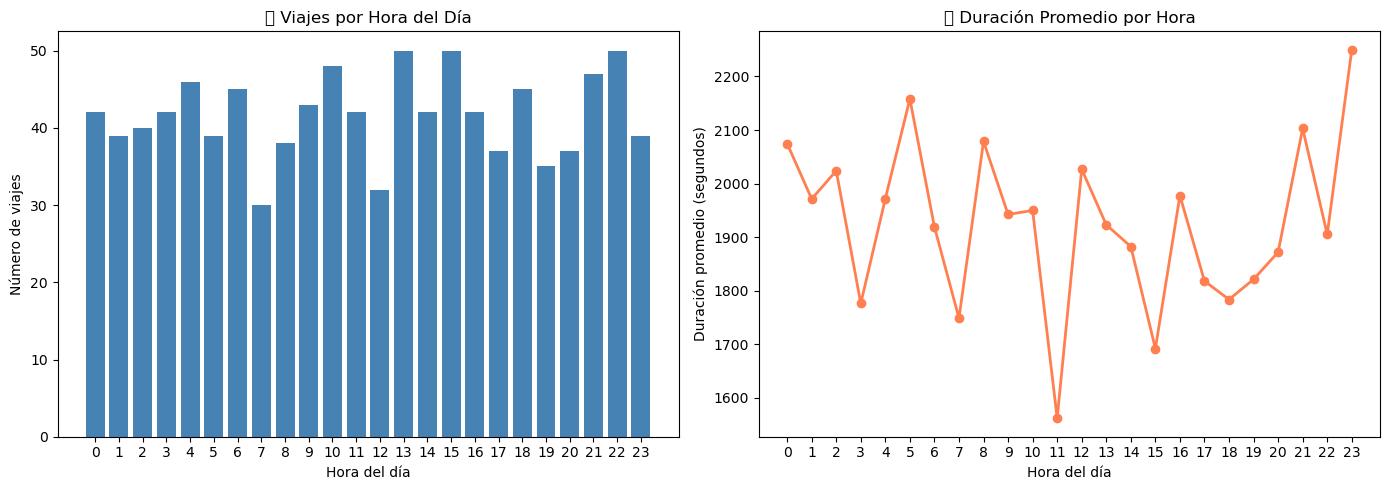


💡 Observaciones:
   - Los datos de muestra están distribuidos uniformemente (generados aleatoriamente)
   - Con datos reales, veríamos patrones de hora pico (8-9 AM, 5-7 PM)


In [26]:
# === VISUALIZACIÓN BÁSICA ===
# Creamos gráficos simples para entender los datos

import matplotlib.pyplot as plt  # Librería de visualización

# Convertimos datos de Spark a Pandas para graficar
# NOTA: Solo hacemos esto con datos pequeños (nuestro resumen)
df_horas_pandas = viajes_por_hora.toPandas()  # Convertir a Pandas DataFrame

# Creamos figura con 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 fila, 2 columnas

# Gráfico 1: Viajes por hora (barras)
axes[0].bar(
    df_horas_pandas['hora_pickup'],      # Eje X: horas
    df_horas_pandas['total_viajes'],     # Eje Y: cantidad de viajes
    color='steelblue'                    # Color de las barras
)
axes[0].set_xlabel('Hora del día')       # Etiqueta eje X
axes[0].set_ylabel('Número de viajes')   # Etiqueta eje Y
axes[0].set_title('📊 Viajes por Hora del Día')  # Título
axes[0].set_xticks(range(0, 24))         # Mostrar todas las horas

# Gráfico 2: Duración promedio por hora (línea)
axes[1].plot(
    df_horas_pandas['hora_pickup'],           # Eje X: horas
    df_horas_pandas['duracion_promedio'],     # Eje Y: duración promedio
    marker='o',                               # Marcador circular en cada punto
    color='coral',                            # Color de la línea
    linewidth=2                               # Grosor de línea
)
axes[1].set_xlabel('Hora del día')
axes[1].set_ylabel('Duración promedio (segundos)')
axes[1].set_title('⏱️ Duración Promedio por Hora')
axes[1].set_xticks(range(0, 24))

# Ajustamos el layout y mostramos
plt.tight_layout()  # Evita que se superpongan los gráficos
plt.show()

print("\n💡 Observaciones:")
print("   - Los datos de muestra están distribuidos uniformemente (generados aleatoriamente)")
print("   - Con datos reales, veríamos patrones de hora pico (8-9 AM, 5-7 PM)")

---
# === SECCIÓN 6: EJERCICIOS PRÁCTICOS ===

## 🎯 Ejercicios

Ahora es tu turno de practicar. Completa los siguientes ejercicios usando lo que aprendiste.

### 🎯 Ejercicio 1: Análisis de Pasajeros

**Objetivo**: Analizar la distribución de pasajeros por viaje.

**Instrucciones**:
1. Cuenta cuántos viajes hay para cada cantidad de pasajeros (1, 2, 3, etc.)
2. Ordena el resultado de mayor a menor cantidad de viajes
3. Calcula el porcentaje de viajes para cada cantidad de pasajeros

**Pistas**:
- Usa `groupBy("passenger_count")` para agrupar
- Usa `count("*")` para contar
- Para calcular porcentaje, divide entre el total y multiplica por 100

In [ ]:
# 🎯 EJERCICIO 1: Tu código aquí
# Completa el código para analizar la distribución de pasajeros

# TODO: Agrupa por passenger_count y cuenta los viajes
# viajes_por_pasajeros = df_viajes.groupBy(...)

# TODO: Ordena de mayor a menor cantidad de viajes

# TODO: Muestra el resultado

print("Tu solución aquí...")

### ✅ Solución Ejercicio 1

### 🎯 Ejercicio 2: Filtrado de Viajes Cortos y Largos

**Objetivo**: Identificar viajes cortos (menos de 5 minutos) y viajes largos (más de 45 minutos).

**Instrucciones**:
1. Filtra los viajes con duración menor a 300 segundos (5 minutos)
2. Filtra los viajes con duración mayor a 2700 segundos (45 minutos)
3. Cuenta cuántos hay de cada tipo
4. Muestra 3 ejemplos de cada categoría

**Pistas**:
- Usa `filter(col("trip_duration") < 300)` para filtrar
- Recuerda que la duración está en segundos

In [ ]:
# 🎯 EJERCICIO 2: Tu código aquí
# Completa el código para identificar viajes cortos y largos

# TODO: Filtra viajes cortos (< 5 minutos = 300 segundos)
# viajes_cortos = df_viajes.filter(...)

# TODO: Filtra viajes largos (> 45 minutos = 2700 segundos)
# viajes_largos = df_viajes.filter(...)

# TODO: Cuenta y muestra resultados

print("Tu solución aquí...")

### 🎯 Ejercicio 3: Crear Nueva Columna Calculada

**Objetivo**: Calcular la distancia aproximada del viaje usando las coordenadas.

**Instrucciones**:
1. Crea una nueva columna `distancia_euclidiana` que calcule la distancia aproximada
2. La fórmula simplificada es: `sqrt((lat2-lat1)^2 + (lon2-lon1)^2) * 111` km
3. Agrupa por vendor_id y calcula la distancia promedio

**Pistas**:
- Usa `withColumn()` para agregar columnas
- Importa `sqrt` y `pow` de `pyspark.sql.functions`
- 1 grado ≈ 111 km (aproximación para NYC)

In [ ]:
# 🎯 EJERCICIO 3: Tu código aquí
# Completa el código para calcular la distancia aproximada

# TODO: Importar funciones necesarias (sqrt, pow)
# from pyspark.sql.functions import sqrt, pow

# TODO: Crear columna de distancia
# df_con_distancia = df_viajes.withColumn("distancia_km", ...)

# TODO: Mostrar estadísticas de distancia por vendor

print("Tu solución aquí...")

### ✅ Solución Ejercicio 3

---
# === RESUMEN FINAL ===

## 📝 Resumen

### Conceptos Clave Aprendidos

| Concepto | Descripción |
|----------|-------------|
| **Big Data** | Datos tan grandes/complejos que requieren herramientas especiales |
| **5 Vs** | Volume, Velocity, Variety, Veracity, Value |
| **Datos Estructurados** | Formato fijo, tablas SQL (~10-20%) |
| **Datos Semi-estructurados** | JSON, XML, con alguna organización |
| **Datos No Estructurados** | Texto libre, imágenes, video (~80%) |
| **SparkSession** | Punto de entrada a PySpark |
| **DataFrame** | Tabla distribuida en Spark |
| **EDA** | Análisis Exploratorio de Datos |

### 🔗 Conexión con AWS Academy

| Concepto Local | Servicio AWS |
|----------------|---------------|
| SparkSession | Amazon EMR, AWS Glue |
| DataFrame | Glue DynamicFrame |
| Datos estructurados | Amazon RDS, Redshift |
| Datos semi-estructurados | DynamoDB, DocumentDB |
| Datos no estructurados | Amazon S3 |
| EDA | AWS Glue DataBrew |

### ➡️ Siguiente Paso

Continúa con: **`labs/02_etl_pipeline/01_etl_concepts.ipynb`**

En el próximo laboratorio aprenderás:
- Qué es ETL (Extract, Transform, Load)
- Diferencias entre ETL y ELT
- Cómo construir un pipeline de datos completo

In [ ]:
# === LIMPIEZA FINAL ===
# Siempre es buena práctica cerrar la SparkSession al terminar

# Detenemos la SparkSession para liberar recursos
spark.stop()

print("✅ SparkSession cerrada correctamente")
print("\n🎉 ¡Felicitaciones! Has completado el Lab 01: Fundamentos de Big Data")
print("\n📚 Recuerda revisar los conceptos y practicar los ejercicios.")
print("➡️ Siguiente: Lab 02 - ETL Pipeline")